In [59]:
import numpy as np
from scipy.fftpack import dct
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from skimage import exposure
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [60]:
# Extract data
X = np.load('Xtrain_Classification_Part1.npy')
y = np.load('Ytrain_Classification_Part1.npy')

X_train, X_validate, y_train, y_validate = train_test_split(X, y)

In [61]:
#Histogram equalization
images = []

for image in X_train:
    images.append(exposure.equalize_hist(image))

images_validate = []

for image in X_validate:
    images_validate.append(exposure.equalize_hist(image))

In [62]:
print("[INFO] evaluating histogram accuracy...")
model = KNeighborsClassifier(n_neighbors=40)
model.fit(images, y_train)
y_pred = model.predict(X_validate)
acc = model.score(images_validate, y_validate)
print("[INFO] histogram accuracy: {:.2f}%".format(acc * 100))

[INFO] evaluating histogram accuracy...
[INFO] histogram accuracy: 72.68%


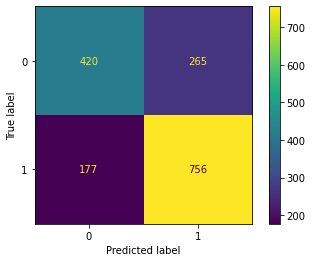

In [63]:
#ConfusionMatrixDisplay.from_predictions(y_test = y_validate, y_pred = y_pred) 

cm = confusion_matrix(y_validate, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)

disp.plot()


In [64]:
print("[INFO] evaluating histogram accuracy...")
model = KNeighborsClassifier(n_neighbors=40)
model.fit(X_train, y_train)
acc = model.score(X_validate, y_validate)
print("[INFO] histogram accuracy: {:.2f}%".format(acc * 100))

[INFO] evaluating histogram accuracy...
[INFO] histogram accuracy: 70.46%
